In [1]:
import sys
sys.path.insert(0, '../../')

import joblib
import pandas as pd
import numpy as np

from pdpbox.info_plots import target_plot
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## test binary classifier

In [2]:
test_titanic = joblib.load('test_titanic.pkl')

titanic_data = test_titanic['data']
titanic_features = test_titanic['features']
titanic_target = test_titanic['target']
titanic_model = test_titanic['xgb_model']

# test target plot

#### (model: binary, feature_type: binary)

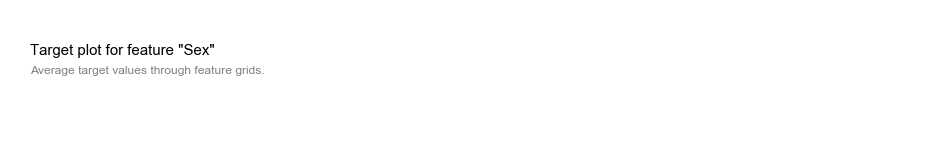

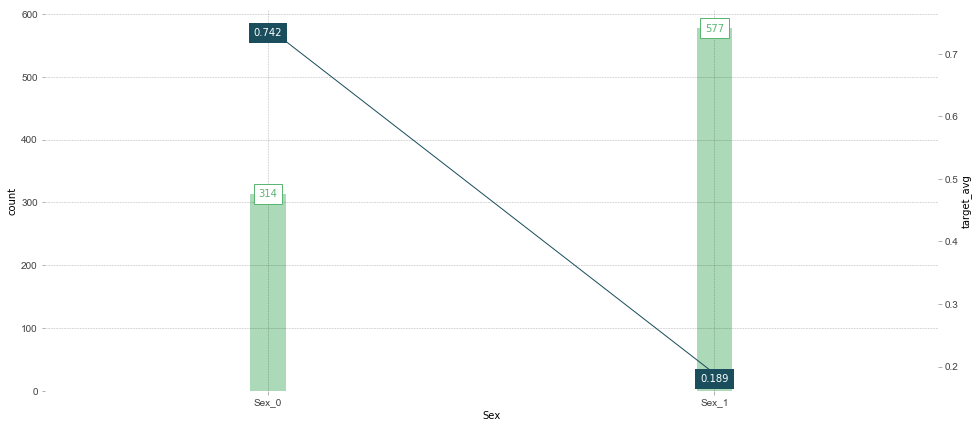

In [3]:
axes, summary_df = target_plot(df=titanic_data, feature='Sex', feature_name='Sex', target=titanic_target)

In [4]:
summary_df

,x,display_column,count,Survived
0,0,Sex_0,314,0.742038
1,1,Sex_1,577,0.188908


In [5]:
titanic_data.groupby('Sex', as_index=False).agg({'PassengerId': 'count', 'Survived': 'mean'})

,Sex,PassengerId,Survived
0,0,314,0.742038
1,1,577,0.188908


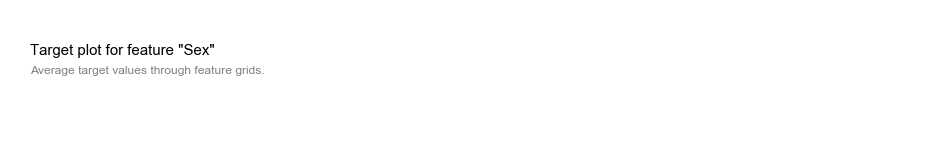

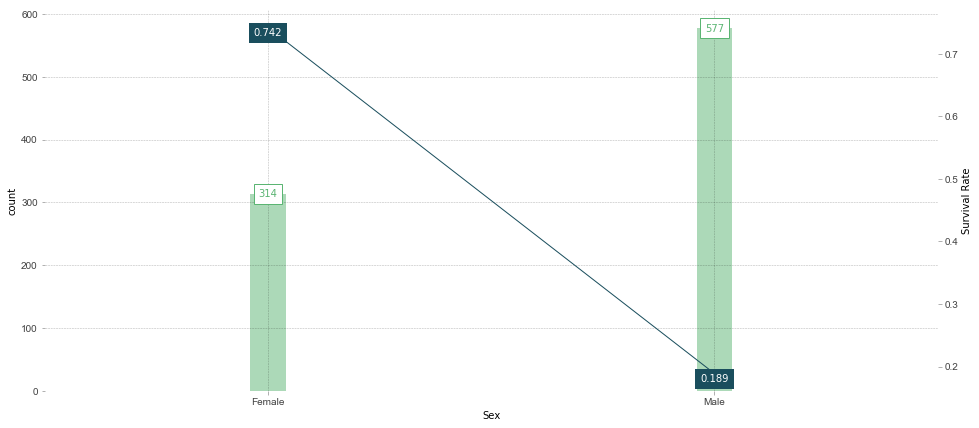

In [6]:
# modify the returned axes
axes, summary_df = target_plot(df=titanic_data, feature='Sex', feature_name='Sex', target=titanic_target)
_ = axes[1].set_xticklabels(['Female', 'Male'])
_ = axes[2].set_ylabel('Survival Rate')

#### (model: binary, feature_type: one-hot)

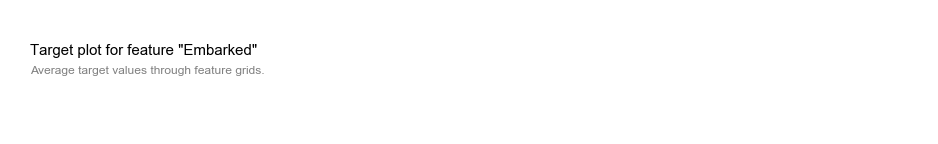

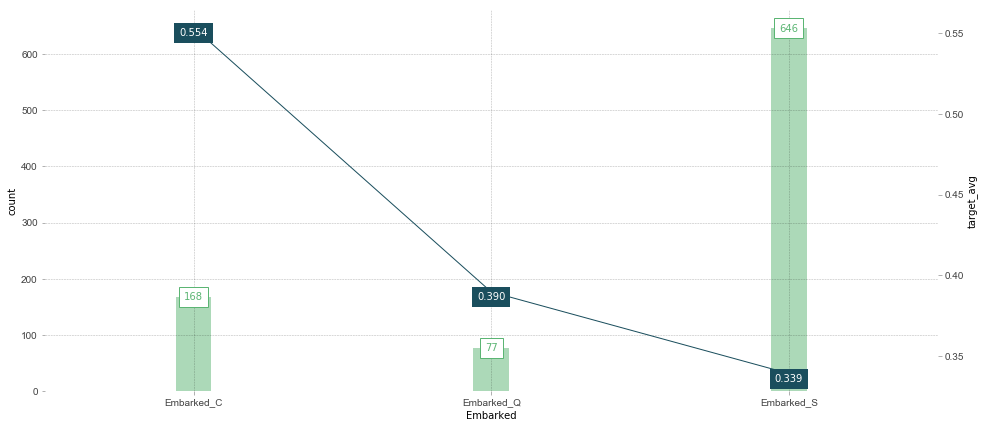

In [7]:
axes, summary_df = target_plot(df=titanic_data, feature=['Embarked_C', 'Embarked_Q', 'Embarked_S'], 
                   feature_name='Embarked', target=titanic_target)

In [8]:
summary_df

,x,display_column,count,Survived
0,0,Embarked_C,168,0.553571
1,1,Embarked_Q,77,0.389610
2,2,Embarked_S,646,0.339009


In [9]:
for col in ['Embarked_C', 'Embarked_Q', 'Embarked_S']:
    print(col, titanic_data[col].sum(), titanic_data[titanic_data[col]==1]['Survived'].mean())

('Embarked_C', 168, 0.5535714285714286)
('Embarked_Q', 77, 0.38961038961038963)
('Embarked_S', 646, 0.33900928792569657)


#### (model: binary, feature_type: numeric)

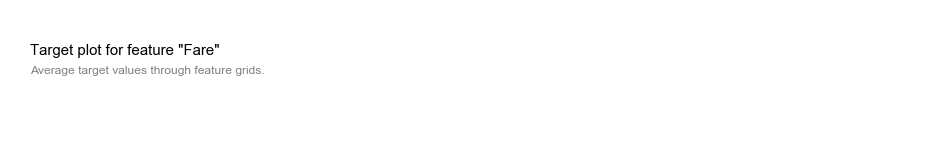

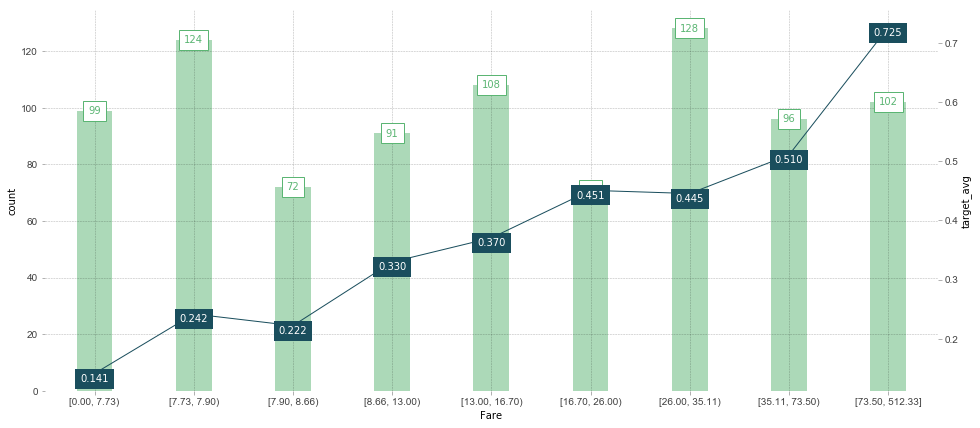

In [10]:
axes, summary_df = target_plot(df=titanic_data, feature='Fare', feature_name='Fare', target=titanic_target)

In [11]:
summary_df

,x,display_column,count,Survived
0,0,"[0.00, 7.73)",99,0.141414
1,1,"[7.73, 7.90)",124,0.241935
2,2,"[7.90, 8.66)",72,0.222222
3,3,"[8.66, 13.00)",91,0.329670
4,4,"[13.00, 16.70)",108,0.370370
5,5,"[16.70, 26.00)",71,0.450704
6,6,"[26.00, 35.11)",128,0.445312
7,7,"[35.11, 73.50)",96,0.510417
8,8,"[73.50, 512.33]",102,0.725490


In [12]:
column_name = 'Fare'
for i in range(summary_df.shape[0]):
    item = summary_df.iloc[i]
    range_numeric = np.array(item['display_column'].replace('[', '').replace(']', '').replace(
        ')', '').split(', ')).astype(np.float64)
    
    subset = titanic_data[(titanic_data[column_name] >= range_numeric[0]) 
                          & (titanic_data[column_name] < range_numeric[1])]
    if i == summary_df.shape[0] - 1:
        subset = titanic_data[(titanic_data[column_name] >= range_numeric[0]) 
                              & (titanic_data[column_name] <= range_numeric[1])]
        
    print(item['display_column'], subset.shape[0], subset['Survived'].mean())

('[0.00, 7.73)', 99, 0.1414141414141414)
('[7.73, 7.90)', 124, 0.24193548387096775)
('[7.90, 8.66)', 72, 0.2222222222222222)
('[8.66, 13.00)', 91, 0.32967032967032966)
('[13.00, 16.70)', 108, 0.37037037037037035)
('[16.70, 26.00)', 71, 0.4507042253521127)
('[26.00, 35.11)', 128, 0.4453125)
('[35.11, 73.50)', 96, 0.5104166666666666)
('[73.50, 512.33]', 102, 0.7254901960784313)


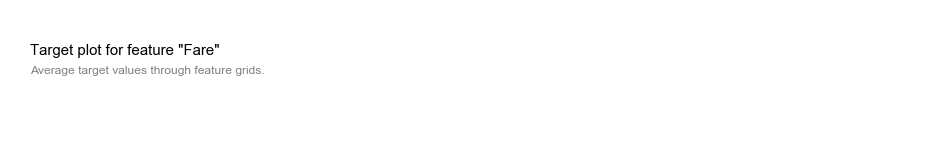

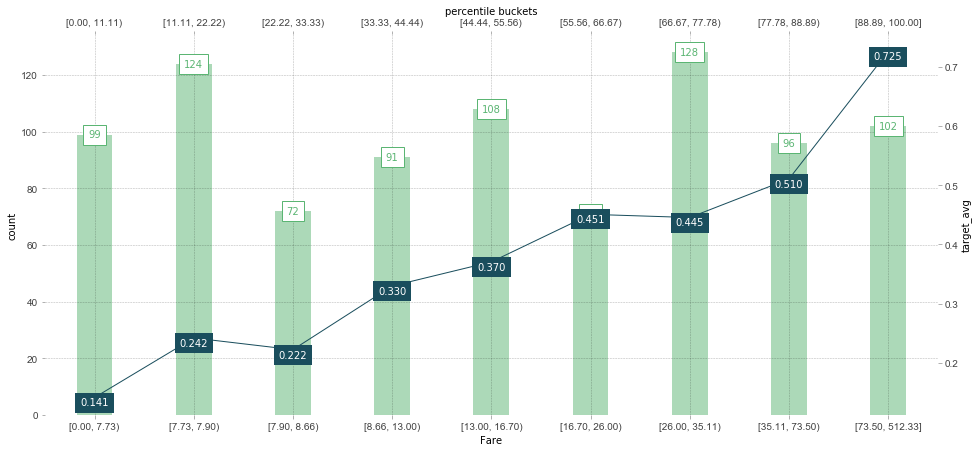

In [13]:
# show percentile
axes, summary_df = target_plot(df=titanic_data, feature='Fare', feature_name='Fare', 
                               target=titanic_target, show_percentile=True)

In [14]:
summary_df

,x,display_column,percentile_column,count,Survived
0,0,"[0.00, 7.73)","[0.00, 11.11)",99,0.141414
1,1,"[7.73, 7.90)","[11.11, 22.22)",124,0.241935
2,2,"[7.90, 8.66)","[22.22, 33.33)",72,0.222222
3,3,"[8.66, 13.00)","[33.33, 44.44)",91,0.329670
4,4,"[13.00, 16.70)","[44.44, 55.56)",108,0.370370
5,5,"[16.70, 26.00)","[55.56, 66.67)",71,0.450704
6,6,"[26.00, 35.11)","[66.67, 77.78)",128,0.445312
7,7,"[35.11, 73.50)","[77.78, 88.89)",96,0.510417
8,8,"[73.50, 512.33]","[88.89, 100.00]",102,0.725490


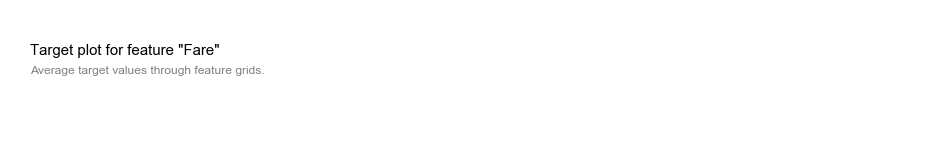

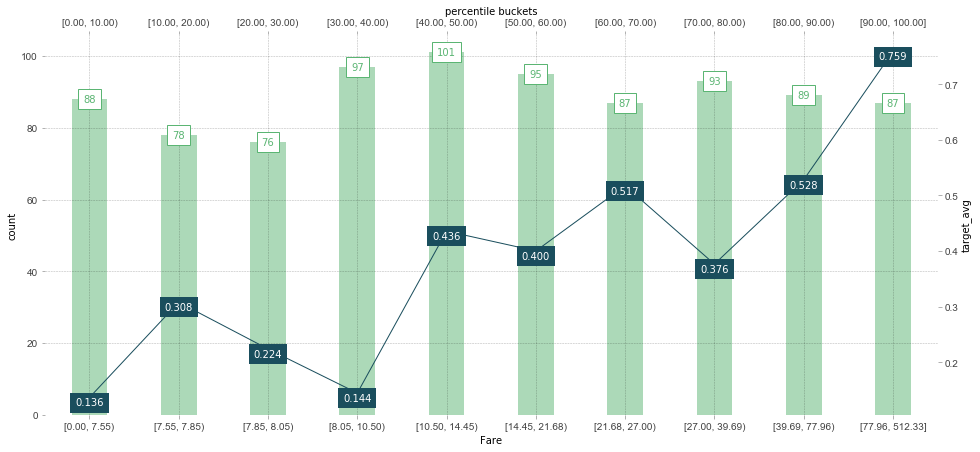

In [15]:
# better percentile grids
_ = target_plot(df=titanic_data, feature='Fare', feature_name='Fare', target=titanic_target, 
                show_percentile=True, num_grid_points=11)

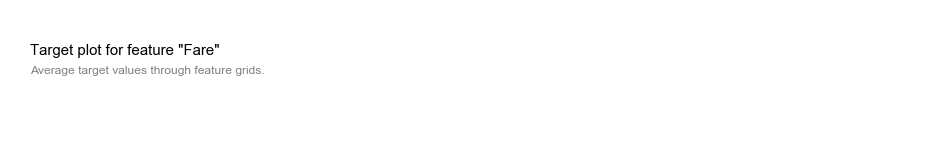

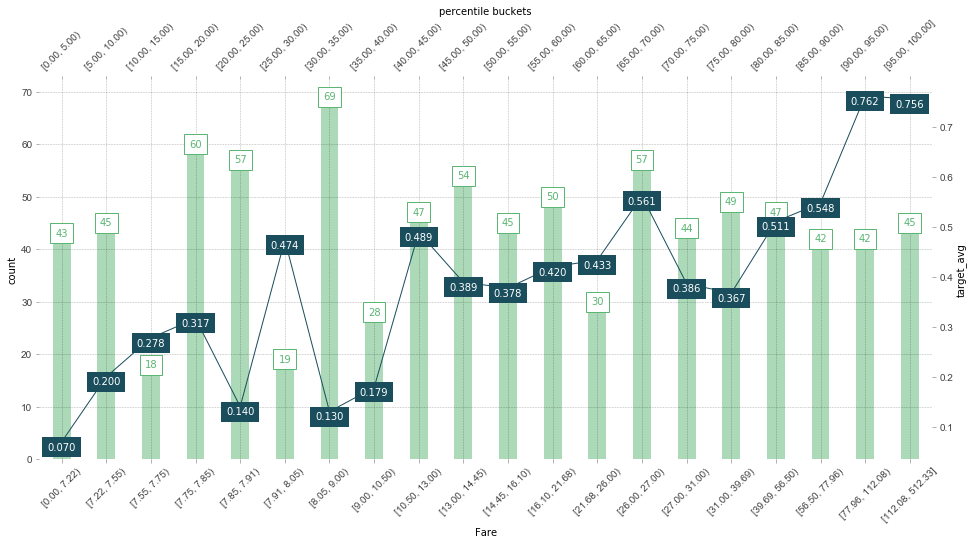

In [16]:
# modify xticks_rotation
_ = target_plot(df=titanic_data, feature='Fare', feature_name='Fare', target=titanic_target, 
                num_grid_points=21, plot_params={'xticks_rotation': 45}, show_percentile=True)

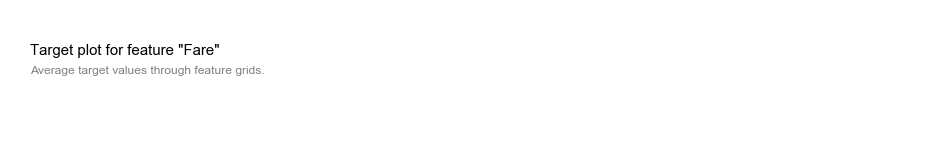

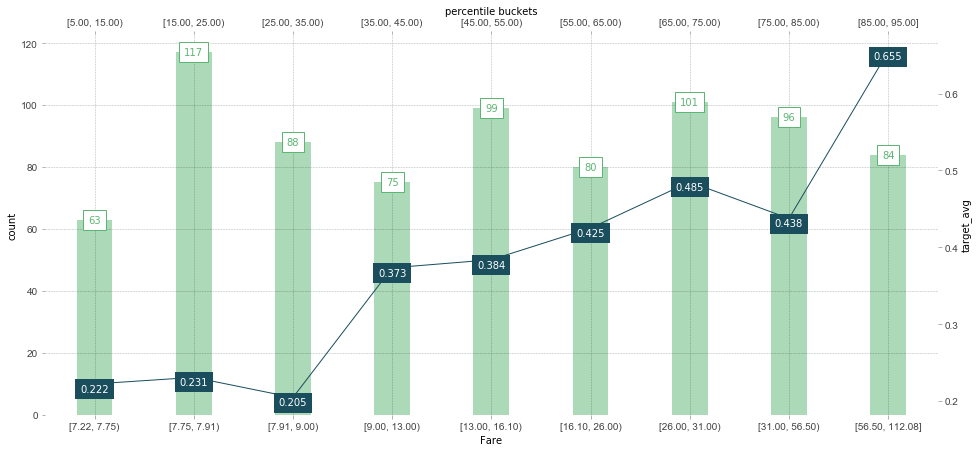

In [17]:
# percentile_range
_ = target_plot(df=titanic_data, feature='Fare', feature_name='Fare', target=titanic_target, 
                num_grid_points=10, grid_type='percentile', percentile_range=(5, 95), show_percentile=True)

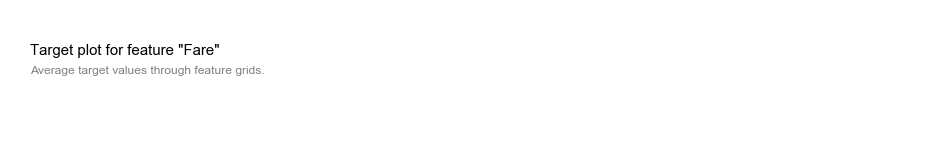

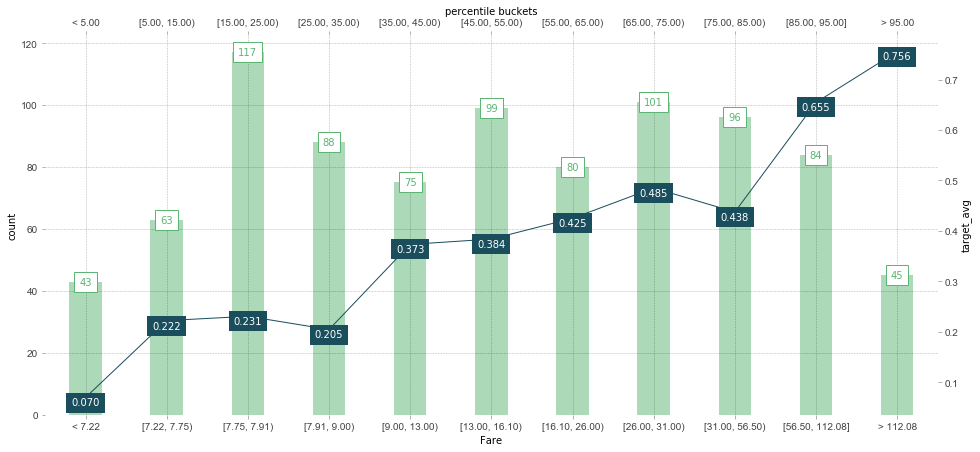

In [18]:
# percentile_range and show_outliers
axes, df = target_plot(df=titanic_data, feature='Fare', feature_name='Fare', target=titanic_target, 
                       num_grid_points=10, grid_type='percentile', percentile_range=(5, 95), 
                       show_percentile=True, show_outliers=True)

In [19]:
df

,x,display_column,percentile_column,count,Survived
0,0,< 7.22,< 5.00,43,0.069767
1,1,"[7.22, 7.75)","[5.00, 15.00)",63,0.222222
2,2,"[7.75, 7.91)","[15.00, 25.00)",117,0.230769
3,3,"[7.91, 9.00)","[25.00, 35.00)",88,0.204545
4,4,"[9.00, 13.00)","[35.00, 45.00)",75,0.373333
5,5,"[13.00, 16.10)","[45.00, 55.00)",99,0.383838
6,6,"[16.10, 26.00)","[55.00, 65.00)",80,0.425000
7,7,"[26.00, 31.00)","[65.00, 75.00)",101,0.485149
8,8,"[31.00, 56.50)","[75.00, 85.00)",96,0.437500
9,9,"[56.50, 112.08]","[85.00, 95.00]",84,0.654762


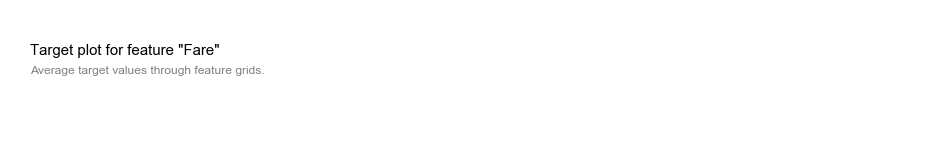

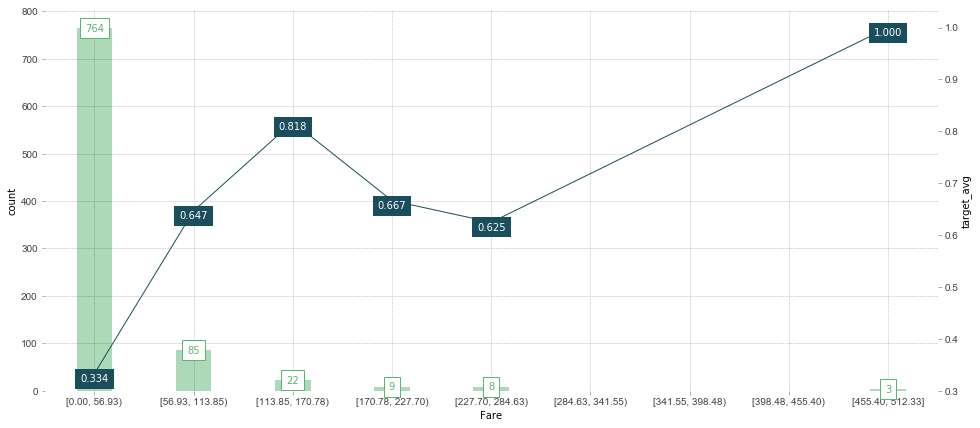

In [20]:
# equal grid type
axes, df = target_plot(df=titanic_data, feature='Fare', feature_name='Fare', target=titanic_target, 
                       num_grid_points=10, grid_type='equal')

In [21]:
df

,x,display_column,count,Survived
0,0,"[0.00, 56.93)",764.0,0.333770
1,1,"[56.93, 113.85)",85.0,0.647059
2,2,"[113.85, 170.78)",22.0,0.818182
3,3,"[170.78, 227.70)",9.0,0.666667
4,4,"[227.70, 284.63)",8.0,0.625000
5,5,"[284.63, 341.55)",0.0,0.000000
6,6,"[341.55, 398.48)",0.0,0.000000
7,7,"[398.48, 455.40)",0.0,0.000000
8,8,"[455.40, 512.33]",3.0,1.000000


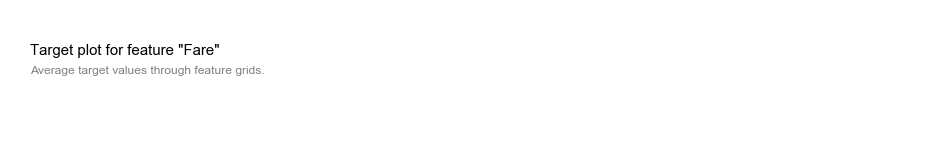

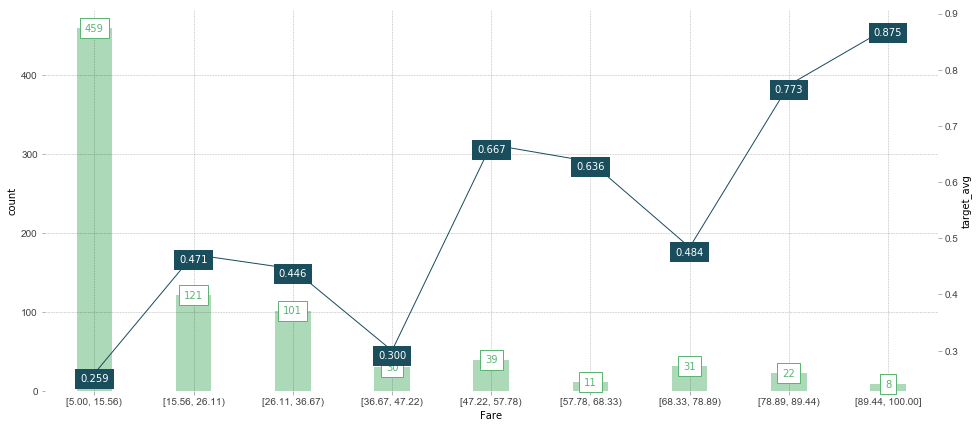

In [22]:
# grid range
_ = target_plot(df=titanic_data, feature='Fare', feature_name='Fare', target=titanic_target, 
                num_grid_points=10, grid_type='equal', grid_range=(5, 100))

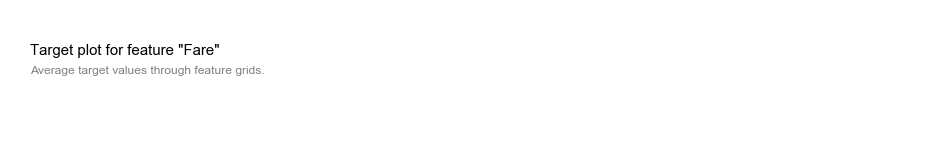

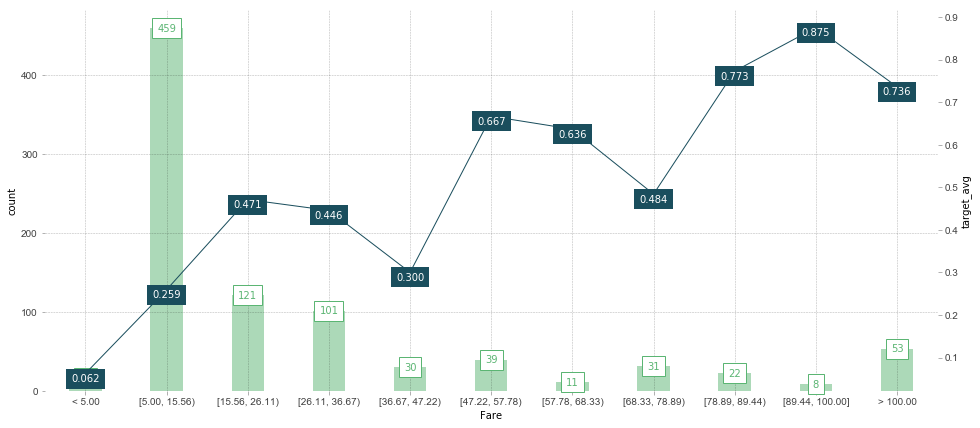

In [24]:
# grid range and show_outliers
_ = target_plot(df=titanic_data, feature='Fare', feature_name='Fare', target=titanic_target, 
                num_grid_points=10, grid_type='equal', grid_range=(5, 100), show_outliers=True)

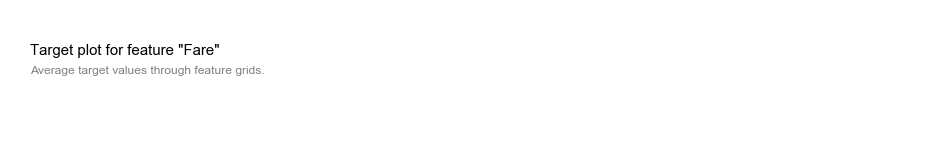

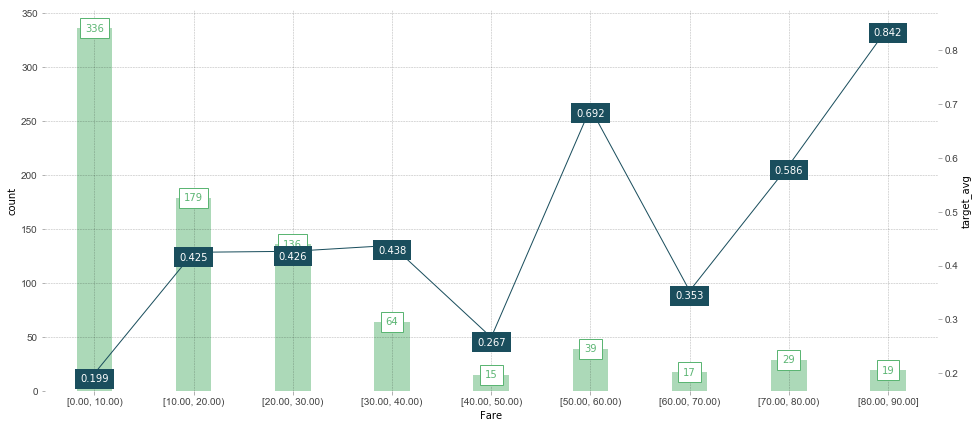

In [25]:
# customized grid points
axes, df = target_plot(df=titanic_data, feature='Fare', feature_name='Fare', target=titanic_target, 
                       cust_grid_points=range(0, 100, 10))

In [26]:
df

,x,display_column,count,Survived
0,0,"[0.00, 10.00)",336,0.199405
1,1,"[10.00, 20.00)",179,0.424581
2,2,"[20.00, 30.00)",136,0.426471
3,3,"[30.00, 40.00)",64,0.437500
4,4,"[40.00, 50.00)",15,0.266667
5,5,"[50.00, 60.00)",39,0.692308
6,6,"[60.00, 70.00)",17,0.352941
7,7,"[70.00, 80.00)",29,0.586207
8,8,"[80.00, 90.00]",19,0.842105


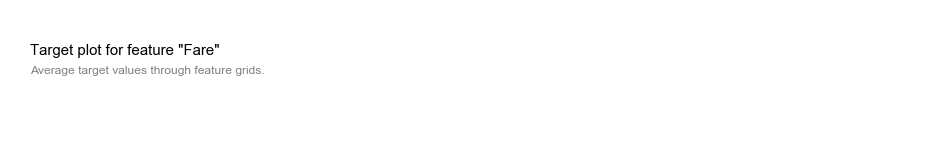

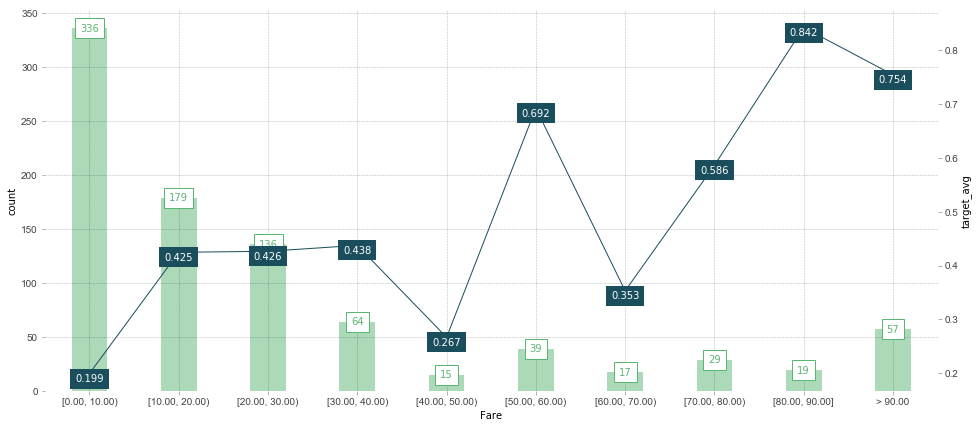

In [27]:
# customized grid points and show_outliers
axes, df = target_plot(df=titanic_data, feature='Fare', feature_name='Fare', target=titanic_target, 
                       cust_grid_points=range(0, 100, 10), show_outliers=True)

In [28]:
df

,x,display_column,count,Survived
0,0,"[0.00, 10.00)",336,0.199405
1,1,"[10.00, 20.00)",179,0.424581
2,2,"[20.00, 30.00)",136,0.426471
3,3,"[30.00, 40.00)",64,0.437500
4,4,"[40.00, 50.00)",15,0.266667
5,5,"[50.00, 60.00)",39,0.692308
6,6,"[60.00, 70.00)",17,0.352941
7,7,"[70.00, 80.00)",29,0.586207
8,8,"[80.00, 90.00]",19,0.842105
9,9,> 90.00,57,0.754386


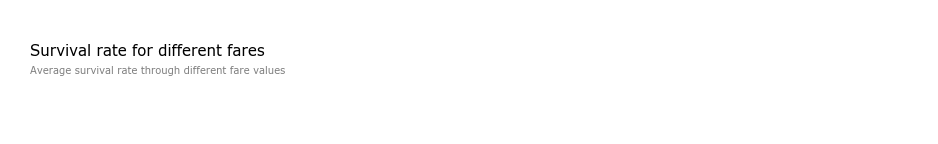

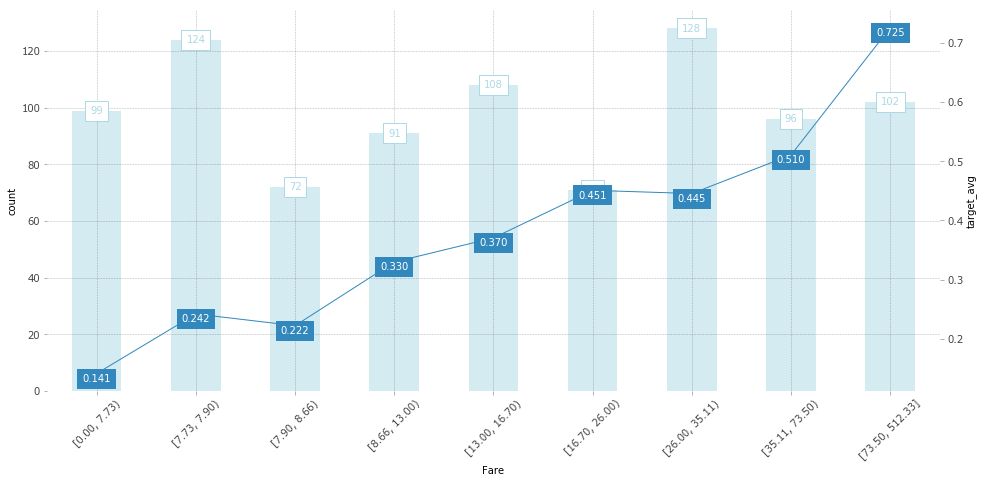

In [31]:
# use plot_params
plot_params = {
    'font_family': 'Verdana',
    'title': 'Survival rate for different fares',
    'subtitle': 'Average survival rate through different fare values',
    'title_fontsize': 15,
    'subtitle_fontsize': 10,
    'line_width': 1,
    'line_color': '#3288bd',
    'line_colors_cmap': 'Blues',
    'line_colors': plt.get_cmap('Blues')(range(20)),
    'bar_color': 'lightblue',
    'bar_width': 0.5,
    'xticks_rotation': 45
}
axes, df = target_plot(df=titanic_data, feature='Fare', feature_name='Fare', target=titanic_target, plot_params=plot_params)

# test target plot interact

In [4]:
from pdpbox.info_plots import target_plot_interact

#### (model: binary, feature_type: binary and onehot)

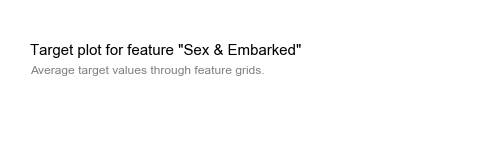

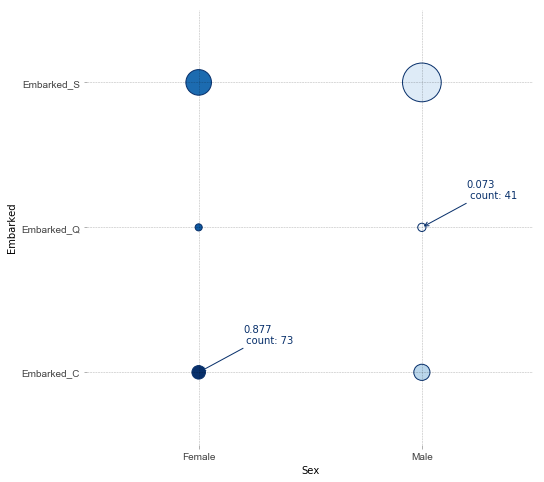

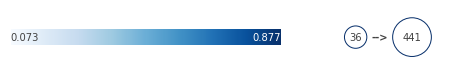

In [33]:
axes, df = target_plot_interact(df=titanic_data, features=['Sex', ['Embarked_C', 'Embarked_Q', 'Embarked_S']], 
                            feature_names=['Sex', 'Embarked'], target=titanic_target)
_ = axes[1].set_xticklabels(['Female', 'Male'])

In [34]:
df

,x1,x2,display_column_1,display_column_2,count,Survived
0,0,0,Sex_0,Embarked_C,73,0.876712
1,0,1,Sex_0,Embarked_Q,36,0.750000
2,0,2,Sex_0,Embarked_S,205,0.692683
3,1,0,Sex_1,Embarked_C,95,0.305263
4,1,1,Sex_1,Embarked_Q,41,0.073171
5,1,2,Sex_1,Embarked_S,441,0.174603


In [35]:
for i in range(df.shape[0]):
    item = df.iloc[i]
    subset = titanic_data[(titanic_data['Sex']==item['x1']) & (titanic_data[item['display_column_2']]==1)]
    print(subset.shape[0], subset['Survived'].mean())

(73, 0.8767123287671232)
(36, 0.75)
(205, 0.6926829268292682)
(95, 0.30526315789473685)
(41, 0.07317073170731707)
(441, 0.1746031746031746)


#### (model: binary, feature_type: onehot and numeric)

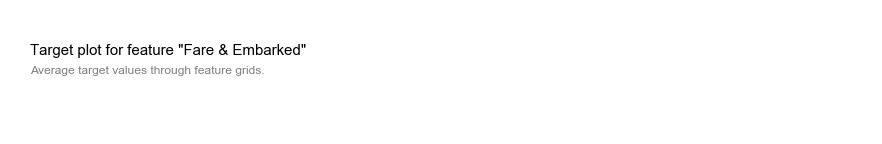

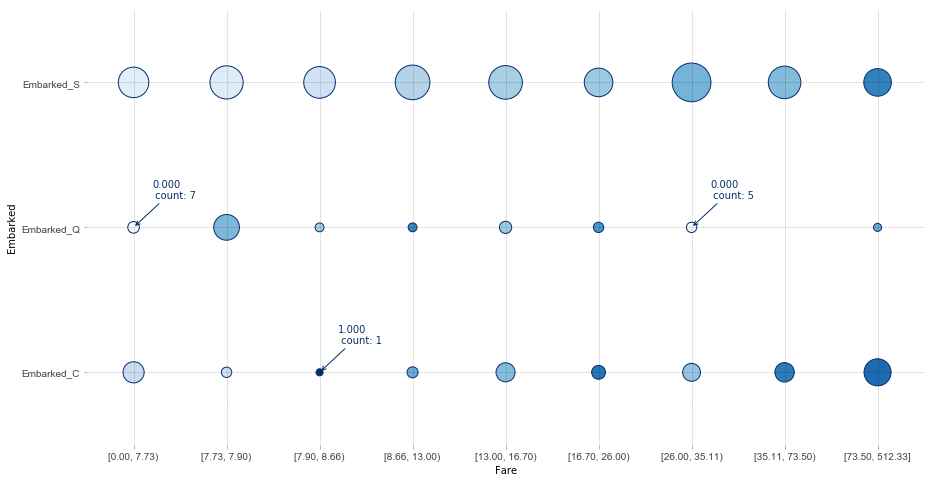

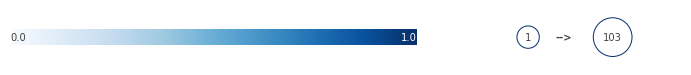

In [36]:
axes, df = target_plot_interact(df=titanic_data, features=['Fare', ['Embarked_C', 'Embarked_Q', 'Embarked_S']], 
                                feature_names=['Fare', 'Embarked'], target=titanic_target, figsize=(15, 8))

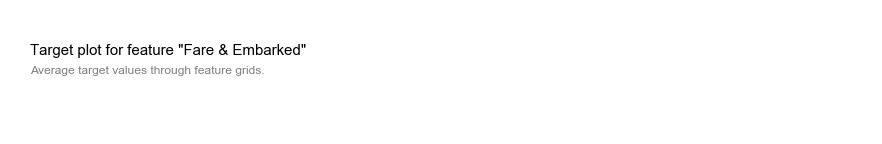

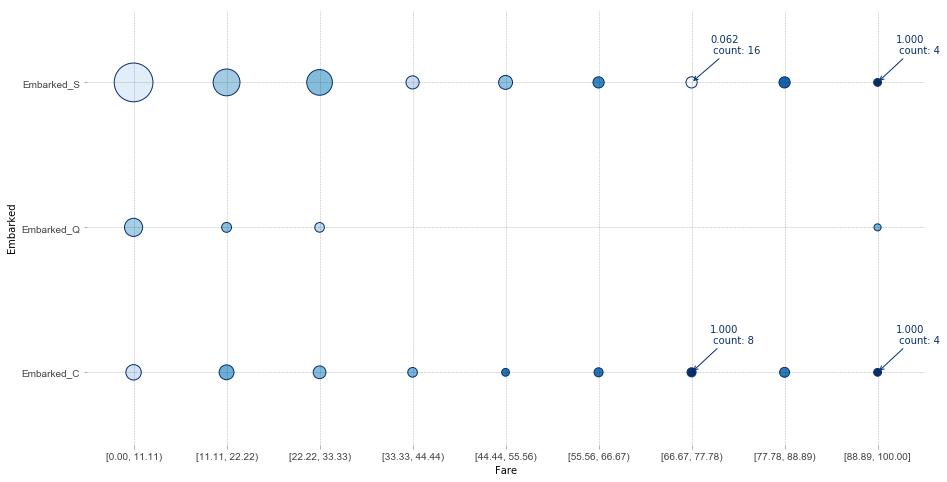

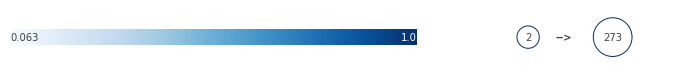

In [37]:
axes, df = target_plot_interact(df=titanic_data, features=['Fare', ['Embarked_C', 'Embarked_Q', 'Embarked_S']], 
                               feature_names=['Fare', 'Embarked'], target=titanic_target, figsize=(15, 8), 
                               grid_ranges=[(0, 100), None], grid_types=['equal', 'percentile'])

In [38]:
df

,x1,x2,display_column_1,display_column_2,count,Survived
0,0,0,"[0.00, 11.11)",Embarked_C,37,0.243243
1,0,1,"[0.00, 11.11)",Embarked_Q,54,0.388889
2,0,2,"[0.00, 11.11)",Embarked_S,273,0.168498
3,1,0,"[11.11, 22.22)",Embarked_C,34,0.529412
4,1,1,"[11.11, 22.22)",Embarked_Q,11,0.454545
5,1,2,"[11.11, 22.22)",Embarked_S,127,0.401575
6,2,0,"[22.22, 33.33)",Embarked_C,23,0.478261
7,2,1,"[22.22, 33.33)",Embarked_Q,10,0.300000
8,2,2,"[22.22, 33.33)",Embarked_S,116,0.474138
9,3,0,"[33.33, 44.44)",Embarked_C,10,0.500000


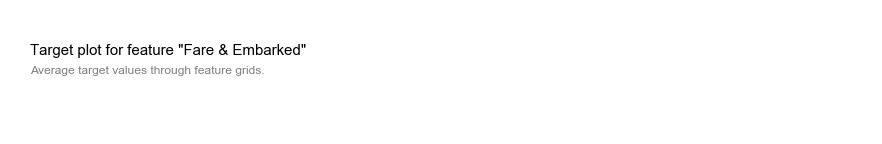

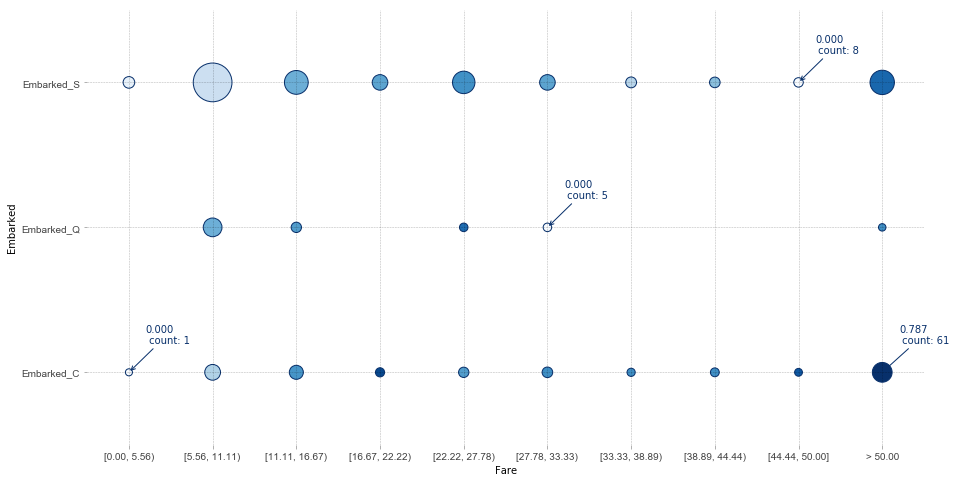

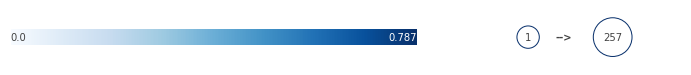

In [5]:
axes, df = target_plot_interact(df=titanic_data, features=['Fare', ['Embarked_C', 'Embarked_Q', 'Embarked_S']], 
                         feature_names=['Fare', 'Embarked'], target=titanic_target, figsize=(15, 8), 
                         grid_ranges=[(0, 50), None], grid_types=['equal', 'percentile'], show_outliers=True, show_percentile=True)

In [6]:
df

,x1,x2,display_column_1,display_column_2,count,Survived
0,0,0,"[0.00, 5.56)",Embarked_C,1,0.000000
1,0,2,"[0.00, 5.56)",Embarked_S,16,0.062500
2,1,0,"[5.56, 11.11)",Embarked_C,36,0.250000
3,1,1,"[5.56, 11.11)",Embarked_Q,54,0.388889
4,1,2,"[5.56, 11.11)",Embarked_S,257,0.175097
5,2,0,"[11.11, 16.67)",Embarked_C,27,0.481481
6,2,1,"[11.11, 16.67)",Embarked_Q,11,0.454545
7,2,2,"[11.11, 16.67)",Embarked_S,92,0.391304
8,3,0,"[16.67, 22.22)",Embarked_C,7,0.714286
9,3,2,"[16.67, 22.22)",Embarked_S,35,0.428571


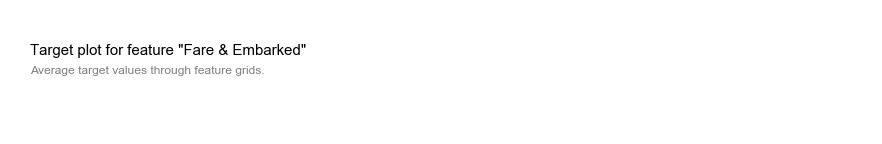

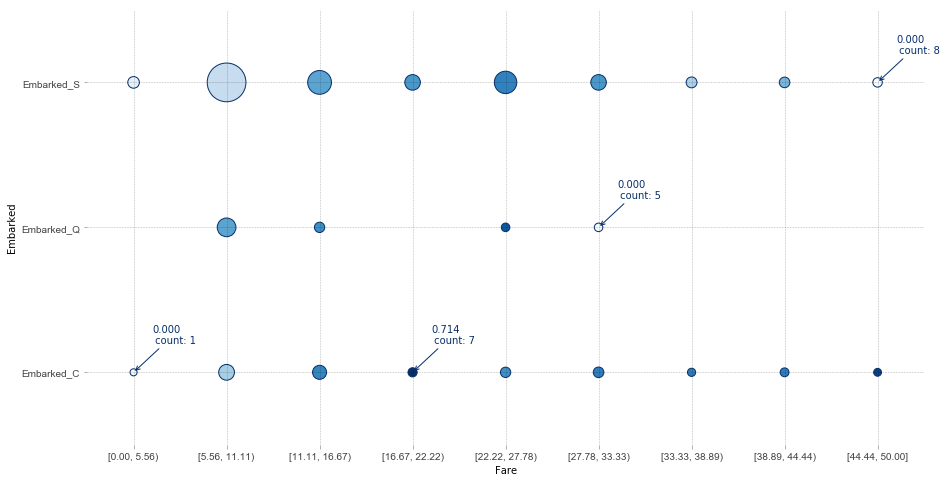

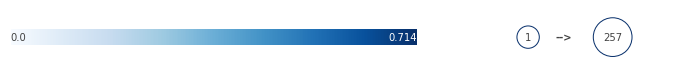

In [40]:
_, df = target_plot_interact(df=titanic_data, features=['Fare', ['Embarked_C', 'Embarked_Q', 'Embarked_S']], 
                         feature_names=['Fare', 'Embarked'], target=titanic_target, figsize=(15, 8), 
                         grid_ranges=[(0, 50), None], grid_types=['equal', 'percentile'], show_outliers=False)

In [41]:
df

,x1,x2,display_column_1,display_column_2,count,Survived
0,0,0,"[0.00, 5.56)",Embarked_C,1,0.000000
1,0,2,"[0.00, 5.56)",Embarked_S,16,0.062500
2,1,0,"[5.56, 11.11)",Embarked_C,36,0.250000
3,1,1,"[5.56, 11.11)",Embarked_Q,54,0.388889
4,1,2,"[5.56, 11.11)",Embarked_S,257,0.175097
5,2,0,"[11.11, 16.67)",Embarked_C,27,0.481481
6,2,1,"[11.11, 16.67)",Embarked_Q,11,0.454545
7,2,2,"[11.11, 16.67)",Embarked_S,92,0.391304
8,3,0,"[16.67, 22.22)",Embarked_C,7,0.714286
9,3,2,"[16.67, 22.22)",Embarked_S,35,0.428571


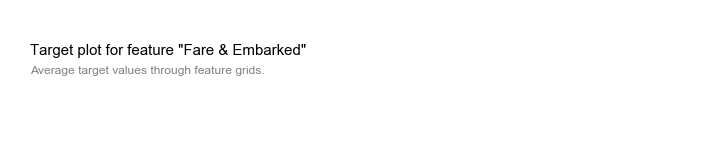

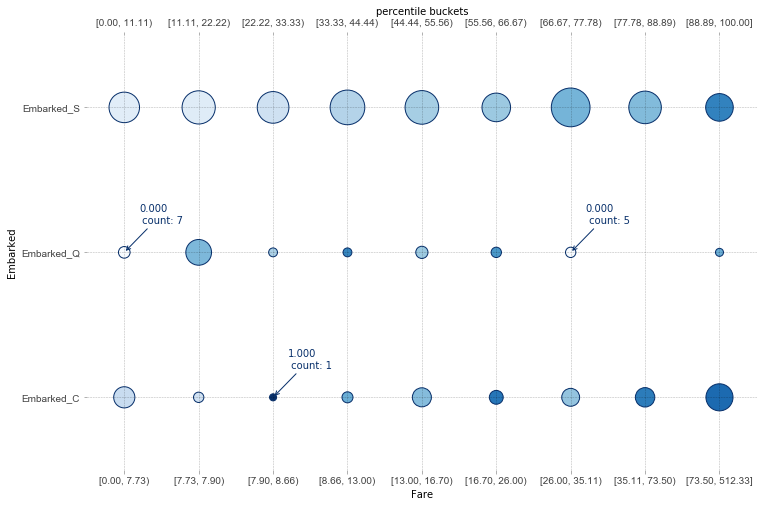

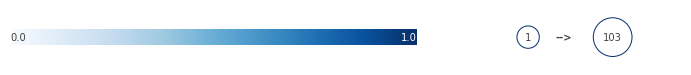

In [46]:
_ = target_plot_interact(df=titanic_data, features=['Fare', ['Embarked_C', 'Embarked_Q', 'Embarked_S']], 
                         feature_names=['Fare', 'Embarked'], target=titanic_target, figsize=(12, 8), show_percentile=True)

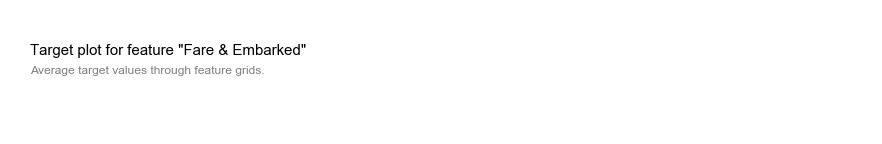

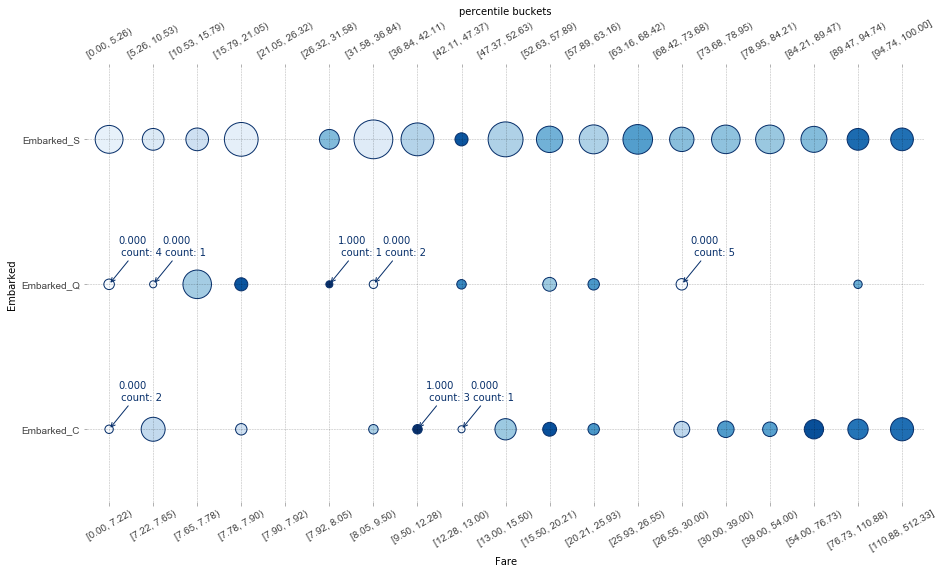

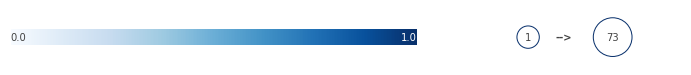

In [47]:
_ = target_plot_interact(df=titanic_data, features=['Fare', ['Embarked_C', 'Embarked_Q', 'Embarked_S']], 
                        feature_names=['Fare', 'Embarked'], target=titanic_target, figsize=(15, 8), 
                        num_grid_points=[20, None], show_percentile=True, plot_params={'xticks_rotation': 30})

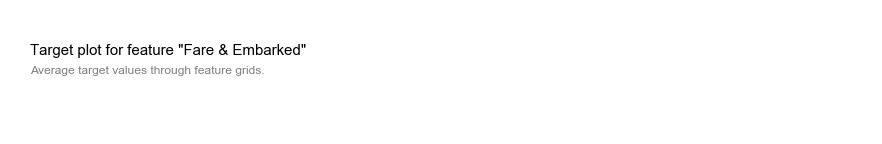

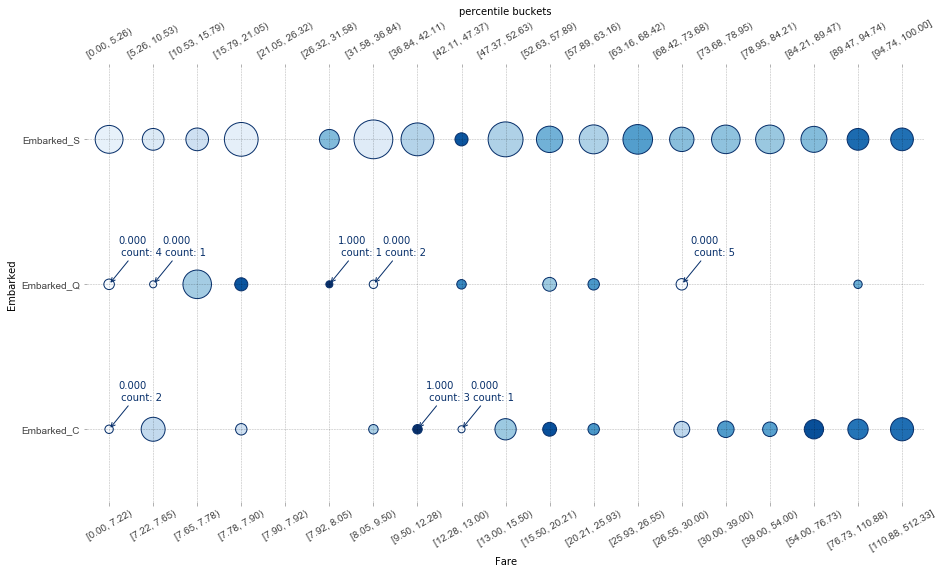

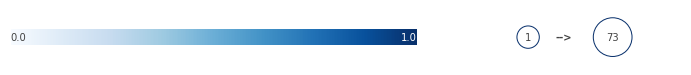

In [48]:
_ = target_plot_interact(df=titanic_data, features=['Fare', ['Embarked_C', 'Embarked_Q', 'Embarked_S']], 
                         feature_names=['Fare', 'Embarked'], target=titanic_target, figsize=(15, 8), 
                         num_grid_points=[20, None], show_percentile=True, plot_params={'xticks_rotation': 30})

#### (model: binary, feature_type: binary and numeric)

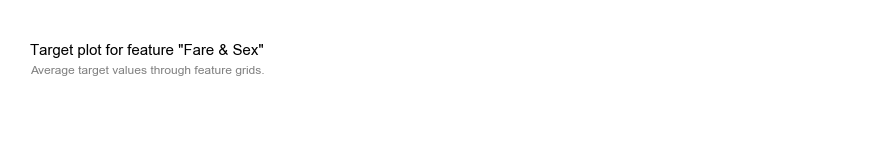

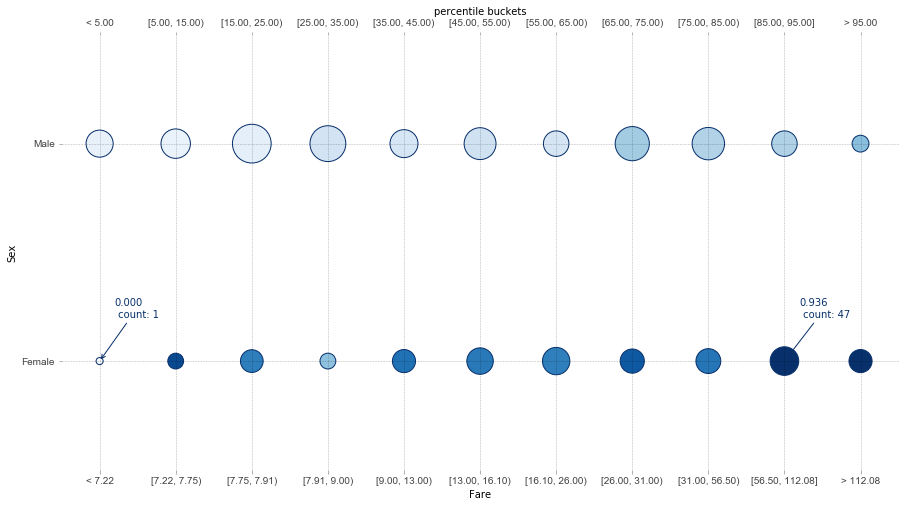

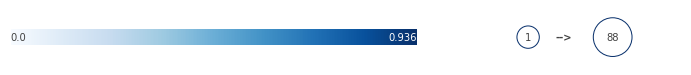

In [8]:
axes, df = target_plot_interact(df=titanic_data, features=['Fare', 'Sex'], feature_names=['Fare', 'Sex'], 
                                target=titanic_target, figsize=(15, 8), show_percentile=True, 
                                percentile_ranges=[(5, 95), None], show_outliers=True)
_ = axes[1].set_yticklabels(['Female', 'Male'])

In [9]:
df

,x1,x2,display_column_1,display_column_2,percentile_column_1,count,Survived
0,0,0,< 7.22,Sex_0,< 5.00,1,0.000000
1,0,1,< 7.22,Sex_1,< 5.00,42,0.071429
2,1,0,"[7.22, 7.75)",Sex_0,"[5.00, 15.00)",13,0.846154
3,1,1,"[7.22, 7.75)",Sex_1,"[5.00, 15.00)",50,0.060000
4,2,0,"[7.75, 7.91)",Sex_0,"[15.00, 25.00)",29,0.655172
5,2,1,"[7.75, 7.91)",Sex_1,"[15.00, 25.00)",88,0.090909
6,3,0,"[7.91, 9.00)",Sex_0,"[25.00, 35.00)",13,0.384615
7,3,1,"[7.91, 9.00)",Sex_1,"[25.00, 35.00)",75,0.173333
8,4,0,"[9.00, 13.00)",Sex_0,"[35.00, 45.00)",30,0.700000
9,4,1,"[9.00, 13.00)",Sex_1,"[35.00, 45.00)",45,0.155556


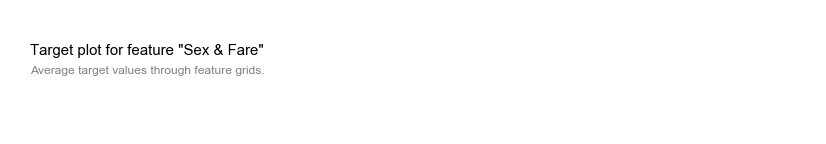

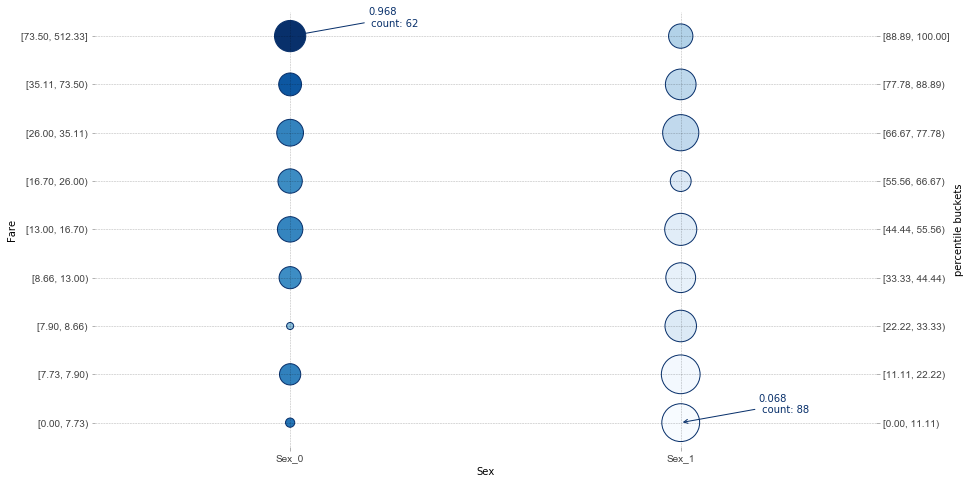

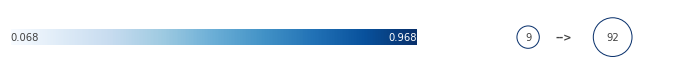

In [50]:
axes, df = target_plot_interact(df=titanic_data, features=['Sex', 'Fare'], feature_names=['Sex', 'Fare'], 
                                target=titanic_target, figsize=(14, 8), show_percentile=True)

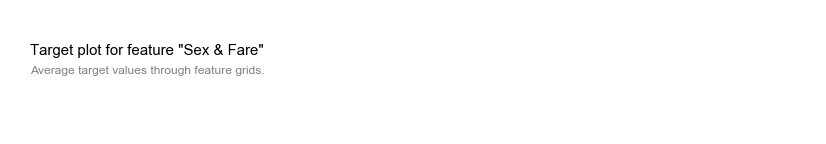

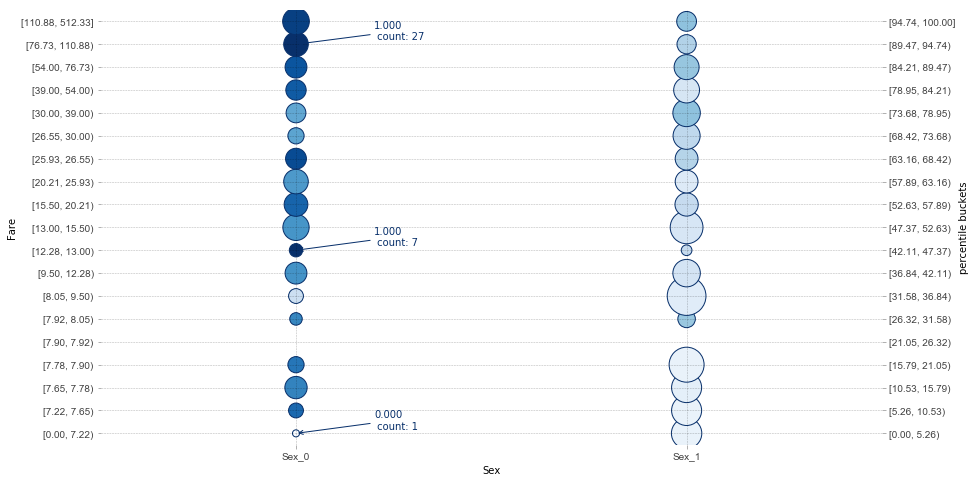

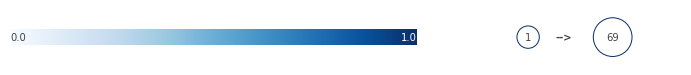

In [51]:
_ = target_plot_interact(df=titanic_data, features=['Sex', 'Fare'], feature_names=['Sex', 'Fare'], 
                         target=titanic_target, figsize=(14, 8), show_percentile=True, num_grid_points=[None, 20])

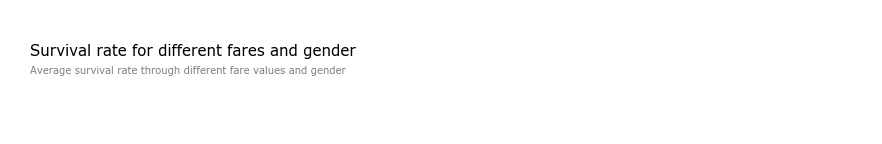

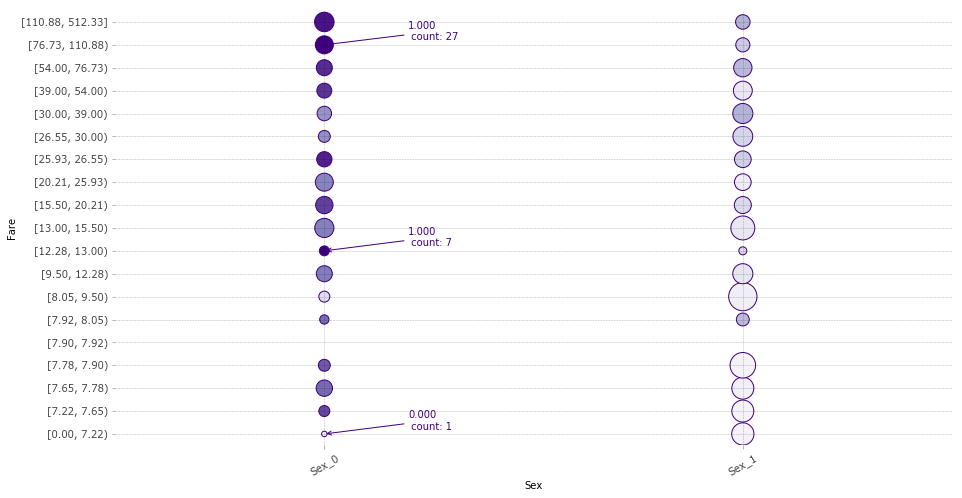

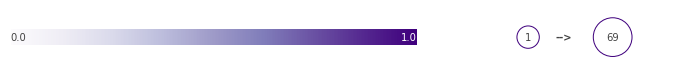

In [57]:
# use plot_params
plot_params = {
    'font_family': 'Verdana',
    'title': 'Survival rate for different fares and gender',
    'subtitle': 'Average survival rate through different fare values and gender',
    'title_fontsize': 15,
    'subtitle_fontsize': 10,
    'cmap': 'Purples',
    'cmaps': ['Blues', 'Greens', 'Oranges', 'Reds', 'Purples', 'Greys'],
    'line_width': 1,
    'xticks_rotation': 30,
    'marker_size_min': 30,
    'marker_size_max': 800
}
_ = target_plot_interact(df=titanic_data, features=['Sex', 'Fare'], feature_names=['Sex', 'Fare'], 
                         target=titanic_target, figsize=(15, 8), num_grid_points=[None, 20], 
                         plot_params=plot_params)